Получение датасета в необходимом формате

In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from file_handler import handler

In [2]:
val_data_proportion = 0.4
#
nb_images = 10
#a
start_val_data_idx = int(nb_images * (1 - val_data_proportion))

#
data_dir = 'resources/after_processing'
#
image_example = 'resources/proc_data/train_data/false-0.jpg'
# Директория с данными для обучения
train_dir = 'train'
# Директория с данными для проверки
val_dir = 'val'
# Директория с данными для тестирования
test_dir = 'test'

In [3]:
handler.train_data_preparation()
handler.data_processing(dir_name=train_dir, start_index=0, end_index=start_val_data_idx)
handler.data_processing(dir_name=val_dir, start_index=start_val_data_idx, end_index=nb_images)

In [16]:
img_width, img_height = handler.get_image_size(image_example)

input_shape = (img_width, img_height, 1)

batch_size = 1

nb_train_samples = handler.counting_files_in_dirs(train_dir)

nb_validation_samples = handler.counting_files_in_dirs(val_dir)

nb_validation_samples

8

In [5]:
def define_model():
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['binary_accuracy']
    )

    return model

In [6]:
def test_check(add_test_data : bool = False, create_dir: bool = True):
    if add_test_data:
        handler.adding_test_data("test", count_files=5, create_new_dir=create_dir)

    test_generator = datagen.flow_from_directory(
        test_dir,
        color_mode="grayscale",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary'
    )
    nb_test_samples = handler.counting_files_in_dirs(test_dir)
    scores = base_model.evaluate_generator(test_generator, nb_test_samples // batch_size)
    return scores[1], test_generator

In [7]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
train_generator = datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 12 images belonging to 2 classes.


In [9]:
val_generator = datagen.flow_from_directory(
    val_dir,
    color_mode="grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8 images belonging to 2 classes.


In [10]:
base_model = define_model()

In [15]:
epoch = 8

history_cnn = base_model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epoch,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/8
12/12 [==============================] - 3s 284ms/step - loss: 0.1080 - binary_accuracy: 1.0000 - val_loss: 0.1609 - val_binary_accuracy: 0.8750
Epoch 2/8
12/12 [==============================] - 3s 281ms/step - loss: 0.4137 - binary_accuracy: 0.9167 - val_loss: 0.0297 - val_binary_accuracy: 1.0000
Epoch 3/8
12/12 [==============================] - 3s 282ms/step - loss: 0.1181 - binary_accuracy: 0.9167 - val_loss: 0.1817 - val_binary_accuracy: 0.8750
Epoch 4/8
12/12 [==============================] - 3s 283ms/step - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 0.7668 - val_binary_accuracy: 0.8750
Epoch 5/8
 1/12 [=>............................] - ETA: 2s - loss: 1.7823e-17 - binary_accuracy: 1.0000

KeyboardInterrupt: 

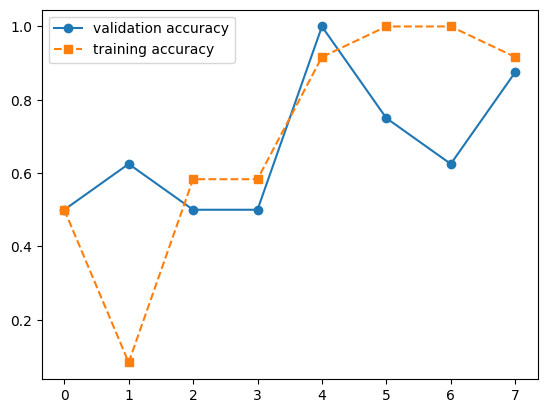

In [12]:
plt.plot(history_cnn.history['val_binary_accuracy'], '-o', label='validation accuracy')
plt.plot(history_cnn.history['binary_accuracy'], '--s', label='training accuracy')
plt.legend();

In [13]:
print(f"{round(test_check(add_test_data=True)[0], 2)}%")

Found 10 images belonging to 2 classes.


C:\Users\poksliun\AppData\Local\Temp\ipykernel_9368\3169326393.py:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = base_model.evaluate_generator(test_generator, nb_test_samples // batch_size)


0.6%


In [14]:
base_model.predict(test_check(add_test_data=False)[1])

Found 10 images belonging to 2 classes.


C:\Users\poksliun\AppData\Local\Temp\ipykernel_9368\3169326393.py:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = base_model.evaluate_generator(test_generator, nb_test_samples // batch_size)


10/10 [==============================] - 0s 25ms/step


array([[0.5979227 ],
       [0.94764745],
       [0.55744714],
       [0.8540575 ],
       [0.6586407 ],
       [0.82632804],
       [0.59299946],
       [0.8268405 ],
       [0.52762926],
       [0.4737507 ]], dtype=float32)